<a href="https://colab.research.google.com/github/lovnishverma/Python-Getting-Started/blob/main/Support_Vector_Machines_(SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machines (SVM)

**Objective:** Understand how SVMs work and implement a complete Machine Learning workflow.

---

## 1. What is an SVM?

Imagine you have red and blue balls on a table and you want to separate them with a stick.

### **The Key Concepts:**
1.  **The Hyperplane (The Stick):** This is the line that separates the classes. SVM tries to find the *best* line.
2.  **The Margin (The Widest Street):** SVM doesn't just find *any* line. It looks for the line that creates the widest gap between the red and blue groups. The wider the gap, the more confident the model is.
3.  **Support Vectors:** These are the specific data points that are closest to the line (touching the edge of the street). They are the "pillars" that hold up the line. If you move other points, the line stays the same. If you move a Support Vector, the line moves.

### **The Kernel Trick (Magic):**
What if the red balls are in the middle of a ring of blue balls? A straight stick can't separate them.
* **Solution:** Imagine lifting the red balls up into the air (adding a 3rd dimension).
* Now you can slide a flat sheet between them.
* This is called the **Kernel Trick** (mapping 2D data to 3D to make it separable).

In [7]:
# Step 1: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import joblib  # For saving/loading models
from sklearn import datasets, svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

print("Libraries Imported Successfully")

Libraries Imported Successfully


## 2. Data Preparation
We will use the **Iris Dataset**. It contains 150 flowers of 3 species (Setosa, Versicolor, Virginica).

In [8]:
# Load Data
iris = datasets.load_iris()
X = iris.data   # Features: Sepal Length, Sepal Width, Petal Length, Petal Width
y = iris.target # Labels: 0, 1, 2

# Split Data (80% Training, 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

Training samples: 120
Testing samples: 30


## 3. Model Training
We will use the **RBF Kernel** (Radial Basis Function). This is the standard kernel that handles non-linear boundaries well.

In [9]:
# Initialize SVM Classifier
# C=1.0: Standard penalty for error.
# kernel='rbf': Creates non-linear boundaries (The "Kernel Trick")
model = svm.SVC(kernel='rbf', C=1.0, gamma='scale')

# Train the model (The machine learns here)
model.fit(X_train, y_train)

print("Model Trained Successfully!")

Model Trained Successfully!


## 4. Evaluation
How well does it work? We check accuracy and visualize the **Confusion Matrix**.

Accuracy: 100.00%

Confusion Matrix:


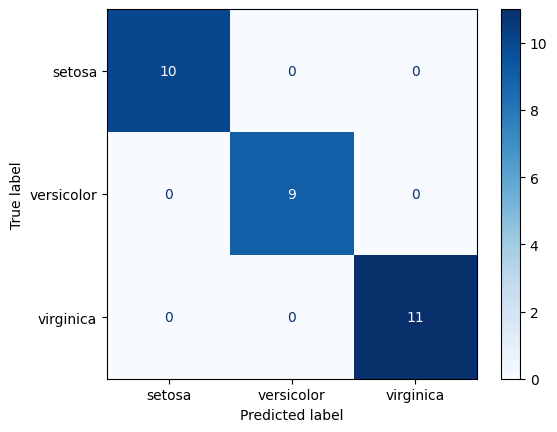

In [10]:
# Make predictions on the Test Set
y_pred = model.predict(X_test)

# Calculate Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc * 100:.2f}%")

# Visualize Confusion Matrix
print("\nConfusion Matrix:")
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=iris.target_names, cmap=plt.cm.Blues)
plt.show()

## 5. Saving the Model
In real life, you don't want to retrain the model every time. We save it to a file (`.pkl`).

In [11]:
filename = 'my_svm_model.pkl'

# Save to disk
joblib.dump(model, filename)
print(f"Model saved as '{filename}'")

Model saved as 'my_svm_model.pkl'


## 6. Loading & Prediction (Real-world Usage)
Now we simulate a new application loading the saved brain to make predictions on new flowers.

In [12]:
# Load the model from the file
loaded_model = joblib.load(filename)
print("Model Loaded from file.")

# NEW UNSEEN DATA (Sample Flower Measurements)
# [Sepal Length, Sepal Width, Petal Length, Petal Width]
new_data = [[5.1, 3.5, 1.4, 0.2]] # This looks like a small Setosa

# Predict
result_index = loaded_model.predict(new_data)
result_name = iris.target_names[result_index][0]

print(f"\n New Flower Features: {new_data}")
print(f"The SVM predicts: {result_name.upper()}")

Model Loaded from file.

 New Flower Features: [[5.1, 3.5, 1.4, 0.2]]
The SVM predicts: SETOSA
